# Exploratory Data Analysis - Amazon ML Training Dataset

This notebook provides a comprehensive analysis of the training dataset including:
- Data loading and structure inspection
- Data quality assessment
- Statistical summaries
- Missing value analysis
- Feature distributions
- Text feature analysis
- Price analysis
- Correlation analysis
- Outlier detection

## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import re





In [3]:
# Load the training data
train_df = pd.read_csv('DATA/student_resource/dataset/train.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {train_df.shape}")
print(f"Total samples: {train_df.shape[0]:,}")
print(f"Total features: {train_df.shape[1]}")

Dataset loaded successfully!
Shape: (75000, 4)
Total samples: 75,000
Total features: 4


## 2. Initial Data Inspection

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
train_df.head()

First 5 rows of the dataset:


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [5]:
# Display last few rows
print("Last 5 rows of the dataset:")
train_df.tail()

Last 5 rows of the dataset:


,sample_id,catalog_content,image_link,price
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275
74999,298504,Item Name: Pimenton de la Vera - Picante (2.47...,https://m.media-amazon.com/images/I/81dFnrP6C4...,28.240


In [6]:
# Basic information about the dataset
print("Dataset Information:")
train_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [7]:
# Column names and data types
print("\nColumn Names and Data Types:")
for col in train_df.columns:
    print(f"{col:20s} - {str(train_df[col].dtype):10s}")


Column Names and Data Types:
sample_id            - int64     
catalog_content      - object    
image_link           - object    
price                - float64   


In [8]:
# Random sample of rows
print("\nRandom sample of 10 rows:")
train_df.sample(10, random_state=42)


Random sample of 10 rows:


,sample_id,catalog_content,image_link,price
26837,158784,"Item Name: Log Cabin Sugar Free Syrup, 24 FL O...",https://m.media-amazon.com/images/I/71QD2OFXqD...,12.195
2592,4095,Item Name: Raspberry Ginseng Oolong Tea (50 te...,https://m.media-amazon.com/images/I/813OiT8mdJ...,38.540
18359,172021,Item Name: Walden Farms Honey Dijon Dressing -...,https://m.media-amazon.com/images/I/71HGx42QmU...,17.860
73292,268276,Item Name: Vlasic Ovals Hamburger Dill Pickle ...,https://m.media-amazon.com/images/I/71AbnhXOTA...,2.940
60127,154791,"Item Name: Amoretti Premium Syrup, Grand Orang...",https://m.media-amazon.com/images/I/61c+aTE6TY...,25.990
71737,242347,Item Name: Matt's Bakery Peanut Butter Soft-Ba...,https://m.media-amazon.com/images/I/811yLVrk-m...,41.510
26473,148621,Item Name: Pineapple Tea-Berry Rooibos Tea (50...,https://m.media-amazon.com/images/I/81HYDzPZUh...,59.200
1040,173571,"Item Name: Brooklyn Beans Coffee Pods, Medium ...",https://m.media-amazon.com/images/I/61wGFnbjDC...,24.920
32622,196574,Item Name: Goldenseal and Witch Hazel Combinat...,https://m.media-amazon.com/images/I/81KSVL4+fV...,82.010
44679,277682,"Item Name: GIANT SLIM JIM MILD, Pack of 24\nPr...",https://m.media-amazon.com/images/I/71jT0xAybp...,19.285


## 3. Data Quality Assessment

In [9]:
# Check for duplicate rows
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(train_df)*100):.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [10]:
# Check for duplicate sample_ids
duplicate_ids = train_df['sample_id'].duplicated().sum()
print(f"\nNumber of duplicate sample_ids: {duplicate_ids:,}")
print(f"Unique sample_ids: {train_df['sample_id'].nunique():,}")


Number of duplicate sample_ids: 0
Unique sample_ids: 75,000


In [11]:
# Missing values analysis
print("\nMissing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': train_df.columns,
    'Missing_Count': train_df.isnull().sum().values,
    'Missing_Percentage': (train_df.isnull().sum().values / len(train_df) * 100)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data.to_string(index=False))


Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [12]:
# Visualize missing values
if missing_data.shape[0] > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    axes[0].barh(missing_data['Column'], missing_data['Missing_Percentage'])
    axes[0].set_xlabel('Missing Percentage')
    axes[0].set_title('Missing Values by Column')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Heatmap
    sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[1])
    axes[1].set_title('Missing Values Heatmap')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


## 4. Statistical Summary

In [13]:
# Numerical features statistical summary
print("Statistical Summary of Numerical Features:")
train_df.describe()

Statistical Summary of Numerical Features:


,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


In [14]:
# Additional statistics for price
print("\nDetailed Price Statistics:")
print(f"Mean: ${train_df['price'].mean():.2f}")
print(f"Median: ${train_df['price'].median():.2f}")
print(f"Mode: ${train_df['price'].mode().values[0]:.2f}")
print(f"Standard Deviation: ${train_df['price'].std():.2f}")
print(f"Variance: {train_df['price'].var():.2f}")
print(f"Skewness: {train_df['price'].skew():.4f}")
print(f"Kurtosis: {train_df['price'].kurtosis():.4f}")
print(f"\nQuantiles:")
print(f"10%: ${train_df['price'].quantile(0.10):.2f}")
print(f"25%: ${train_df['price'].quantile(0.25):.2f}")
print(f"50%: ${train_df['price'].quantile(0.50):.2f}")
print(f"75%: ${train_df['price'].quantile(0.75):.2f}")
print(f"90%: ${train_df['price'].quantile(0.90):.2f}")
print(f"95%: ${train_df['price'].quantile(0.95):.2f}")
print(f"99%: ${train_df['price'].quantile(0.99):.2f}")


Detailed Price Statistics:
Mean: $23.65
Median: $14.00
Mode: $14.99
Standard Deviation: $33.38
Variance: 1114.02
Skewness: 13.6014
Kurtosis: 736.6545

Quantiles:
10%: $3.57
25%: $6.79
50%: $14.00
75%: $28.62
90%: $52.30
95%: $75.71
99%: $145.25


## 5. Text Feature Analysis - Catalog Content

In [15]:
# Parse catalog_content to extract structured information
def parse_catalog_content(text):
    if pd.isna(text):
        return {}
    
    fields = {}
    lines = text.strip().split('\n')
    
    for line in lines:
        if ':' in line:
            key, value = line.split(':', 1)
            fields[key.strip()] = value.strip()
    
    return fields

# Extract all unique field types from catalog_content
all_fields = []
for content in train_df['catalog_content'].dropna():
    parsed = parse_catalog_content(content)
    all_fields.extend(parsed.keys())

field_counts = Counter(all_fields)
print("\nField Types in Catalog Content:")
for field, count in field_counts.most_common():
    print(f"{field:30s}: {count:,} ({count/len(train_df)*100:.2f}%)")


Field Types in Catalog Content:
Value                         : 75,000 (100.00%)
Unit                          : 75,000 (100.00%)
Item Name                     : 74,993 (99.99%)
Bullet Point 1                : 54,476 (72.63%)
Bullet Point 2                : 54,476 (72.63%)
Bullet Point 3                : 52,583 (70.11%)
Bullet Point 4                : 48,133 (64.18%)
Bullet Point 5                : 41,452 (55.27%)
Product Description           : 32,533 (43.38%)
Bullet Point                  : 6,247 (8.33%)
Bullet Point 6                : 5,521 (7.36%)
Bullet Point 7                : 2,249 (3.00%)
Bullet Point 8                : 1,185 (1.58%)
Bullet Point 9                : 760 (1.01%)
Bullet Point 10               : 458 (0.61%)
Bullet Point 11               : 33 (0.04%)
Bullet Point 12               : 23 (0.03%)
Bullet Point 13               : 16 (0.02%)
Bullet Point 14               : 11 (0.01%)
Bullet Point 15               : 8 (0.01%)
Item Name 1                   : 7 (0.01%)
Item 

In [16]:
# Extract specific fields
train_df['item_name'] = train_df['catalog_content'].apply(
    lambda x: parse_catalog_content(x).get('Item Name', None) if pd.notna(x) else None
)

train_df['value'] = train_df['catalog_content'].apply(
    lambda x: parse_catalog_content(x).get('Value', None) if pd.notna(x) else None
)

train_df['unit'] = train_df['catalog_content'].apply(
    lambda x: parse_catalog_content(x).get('Unit', None) if pd.notna(x) else None
)

print("\nExtracted Fields Summary:")
print(f"Items with Item Name: {train_df['item_name'].notna().sum():,} ({train_df['item_name'].notna().sum()/len(train_df)*100:.2f}%)")
print(f"Items with Value: {train_df['value'].notna().sum():,} ({train_df['value'].notna().sum()/len(train_df)*100:.2f}%)")
print(f"Items with Unit: {train_df['unit'].notna().sum():,} ({train_df['unit'].notna().sum()/len(train_df)*100:.2f}%)")


Extracted Fields Summary:
Items with Item Name: 74,993 (99.99%)
Items with Value: 75,000 (100.00%)
Items with Unit: 75,000 (100.00%)


In [17]:
# Analyze item names
train_df['item_name_length'] = train_df['item_name'].str.len()
train_df['item_name_word_count'] = train_df['item_name'].str.split().str.len()

print("\nItem Name Statistics:")
print(f"Average length: {train_df['item_name_length'].mean():.2f} characters")
print(f"Average word count: {train_df['item_name_word_count'].mean():.2f} words")
print(f"Max length: {train_df['item_name_length'].max():.0f} characters")
print(f"Min length: {train_df['item_name_length'].min():.0f} characters")


Item Name Statistics:
Average length: 86.04 characters
Average word count: 14.49 words
Max length: 480 characters
Min length: 0 characters


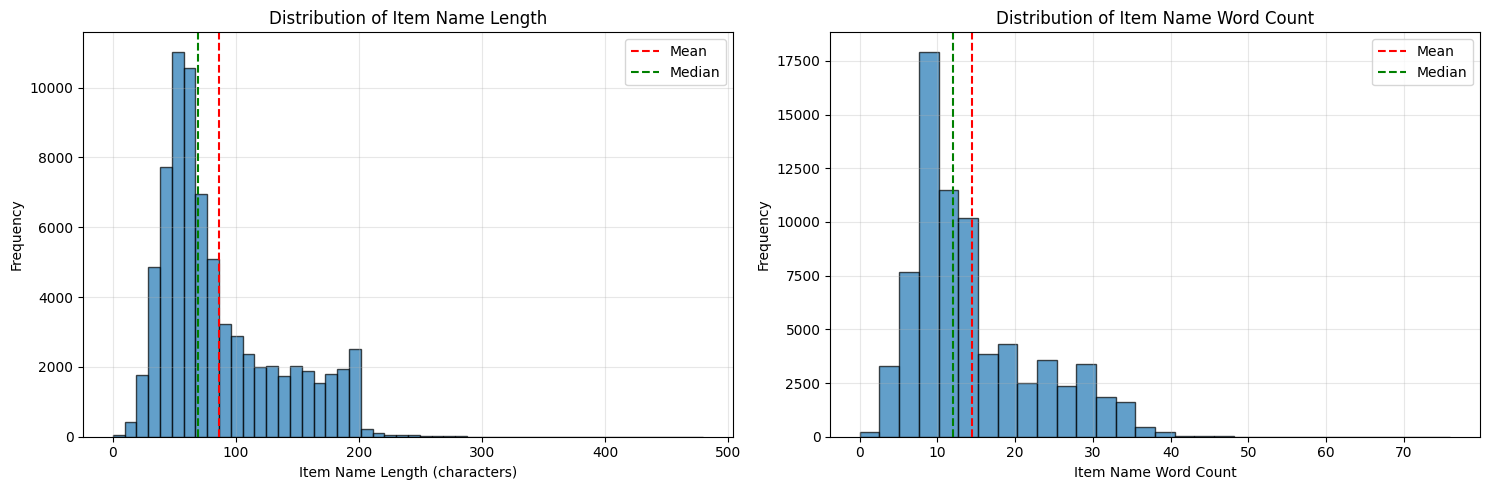

In [18]:
# Visualize item name length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_df['item_name_length'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Item Name Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Item Name Length')
axes[0].axvline(train_df['item_name_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(train_df['item_name_length'].median(), color='green', linestyle='--', label='Median')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(train_df['item_name_word_count'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Item Name Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Item Name Word Count')
axes[1].axvline(train_df['item_name_word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(train_df['item_name_word_count'].median(), color='green', linestyle='--', label='Median')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Count bullet points in catalog content
def count_bullet_points(text):
    if pd.isna(text):
        return 0
    return len(re.findall(r'Bullet Point \d+:', text))

train_df['bullet_point_count'] = train_df['catalog_content'].apply(count_bullet_points)

print("\nBullet Point Statistics:")
print(train_df['bullet_point_count'].value_counts().sort_index().to_string())
print(f"\nAverage bullet points per item: {train_df['bullet_point_count'].mean():.2f}")
print(f"Items with bullet points: {(train_df['bullet_point_count'] > 0).sum():,} ({(train_df['bullet_point_count'] > 0).sum()/len(train_df)*100:.2f}%)")


Bullet Point Statistics:
bullet_point_count
0     20524
2      1893
3      4450
4      6681
5     35931
6      3272
7      1064
8       425
9       302
10      425
11       10
12        7
13        5
14        3
15        4
16        1
17        1
21        1
26        1

Average bullet points per item: 3.49
Items with bullet points: 54,476 (72.63%)


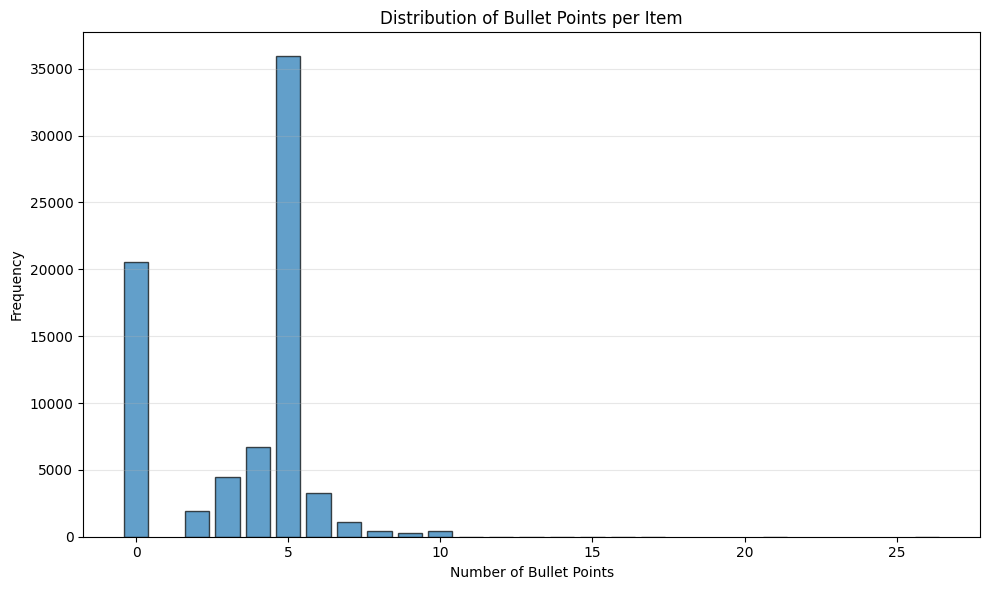

In [20]:
# Visualize bullet point distribution
plt.figure(figsize=(10, 6))
bullet_counts = train_df['bullet_point_count'].value_counts().sort_index()
plt.bar(bullet_counts.index, bullet_counts.values, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Bullet Points')
plt.ylabel('Frequency')
plt.title('Distribution of Bullet Points per Item')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# Check for product description
def has_product_description(text):
    if pd.isna(text):
        return False
    return 'Product Description:' in text

train_df['has_description'] = train_df['catalog_content'].apply(has_product_description)

print("\nProduct Description Availability:")
print(f"Items with description: {train_df['has_description'].sum():,} ({train_df['has_description'].sum()/len(train_df)*100:.2f}%)")
print(f"Items without description: {(~train_df['has_description']).sum():,} ({(~train_df['has_description']).sum()/len(train_df)*100:.2f}%)")


Product Description Availability:
Items with description: 32,533 (43.38%)
Items without description: 42,467 (56.62%)


In [23]:
# Total catalog content length
train_df['catalog_content_length'] = train_df['catalog_content'].str.len()

print("\nCatalog Content Length Statistics:")
print(f"Mean: {train_df['catalog_content_length'].mean():.2f} characters")
print(f"Median: {train_df['catalog_content_length'].median():.2f} characters")
print(f"Std: {train_df['catalog_content_length'].std():.2f}")
print(f"Min: {train_df['catalog_content_length'].min():.0f} characters")
print(f"Max: {train_df['catalog_content_length'].max():.0f} characters")


Catalog Content Length Statistics:
Mean: 908.89 characters
Median: 643.00 characters
Std: 852.90
Min: 32 characters
Max: 7894 characters


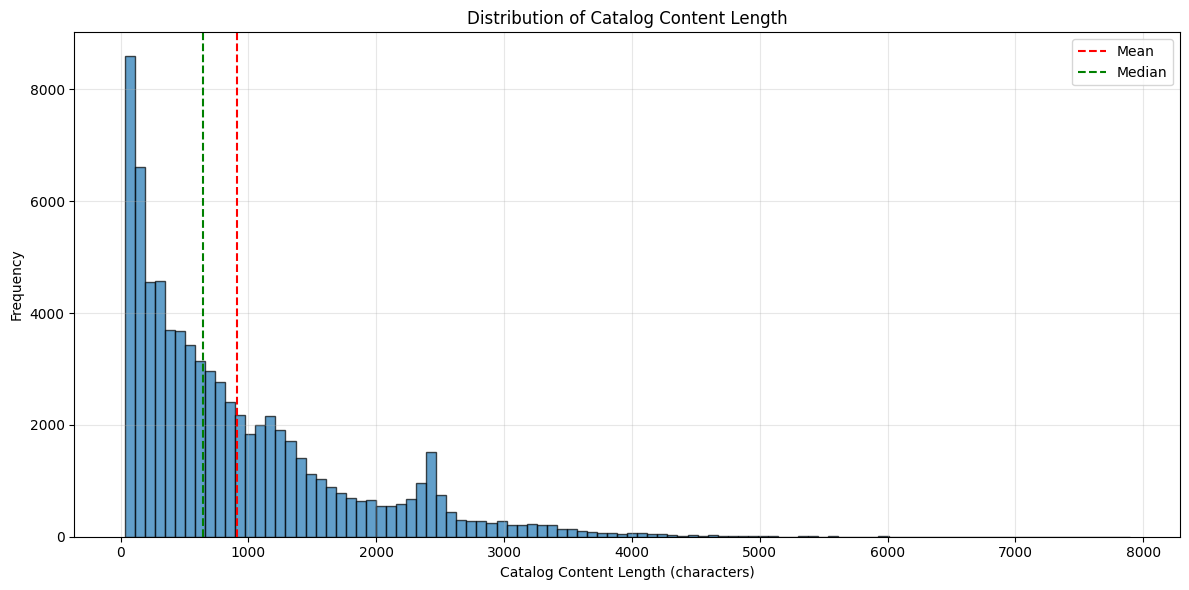

In [24]:
# Visualize catalog content length
plt.figure(figsize=(12, 6))
plt.hist(train_df['catalog_content_length'].dropna(), bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Catalog Content Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Catalog Content Length')
plt.axvline(train_df['catalog_content_length'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(train_df['catalog_content_length'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Unit Analysis

In [25]:
# Analyze units
print("\nTop 20 Most Common Units:")
unit_counts = train_df['unit'].value_counts().head(20)
print(unit_counts.to_string())

print(f"\nTotal unique units: {train_df['unit'].nunique()}")


Top 20 Most Common Units:
unit
Ounce          40984
Count          17457
Fl Oz          11086
ounce           1960
oz               962
None             940
count            741
pound            158
fl oz            128
Oz                78
ct                46
Pound             44
lb                30
Fluid Ounce       30
FL Oz             28
OZ                24
Fl. Oz            21
gram              20
Gram              19
COUNT             16

Total unique units: 92


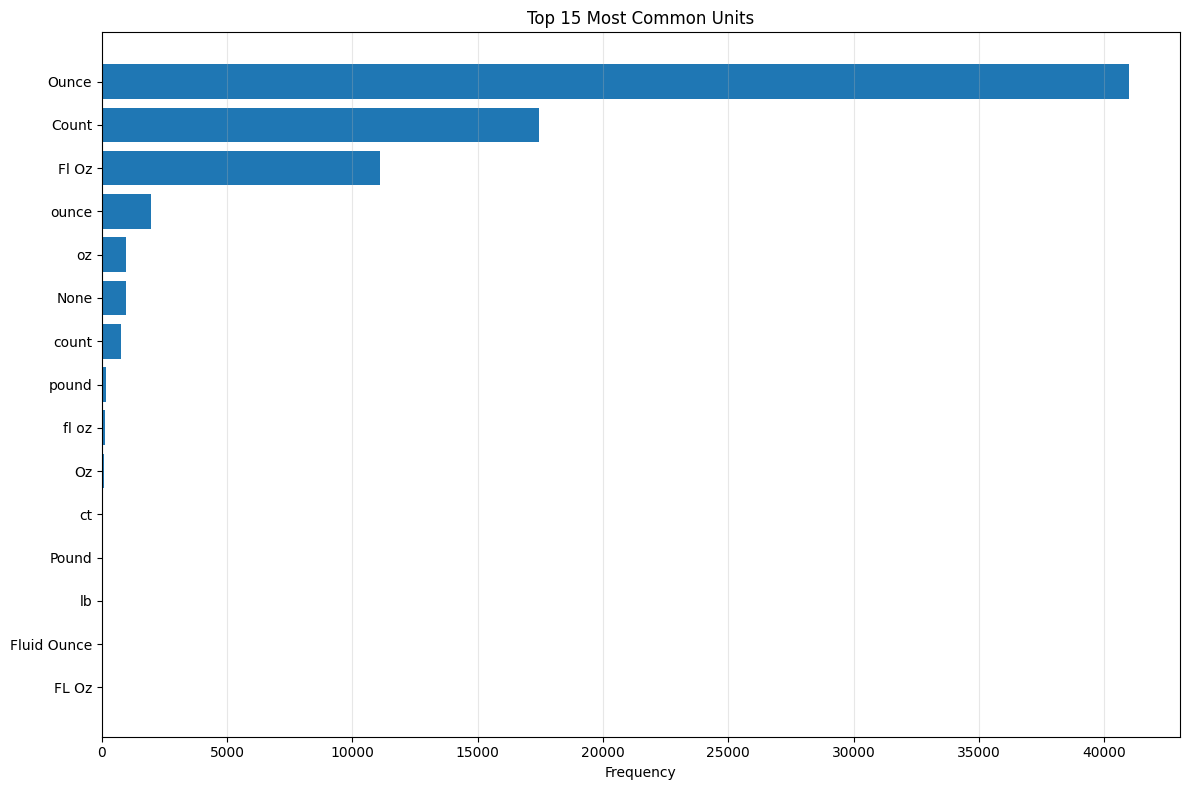

In [26]:
# Visualize top units
plt.figure(figsize=(12, 8))
top_units = train_df['unit'].value_counts().head(15)
plt.barh(range(len(top_units)), top_units.values)
plt.yticks(range(len(top_units)), top_units.index)
plt.xlabel('Frequency')
plt.title('Top 15 Most Common Units')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
# Categorize units
def categorize_unit(unit):
    if pd.isna(unit):
        return 'Unknown'
    unit_lower = unit.lower()
    
    if any(word in unit_lower for word in ['ounce', 'oz', 'pound', 'lb', 'gram', 'kilogram', 'kg']):
        return 'Weight'
    elif any(word in unit_lower for word in ['fl oz', 'fluid', 'liter', 'litre', 'gallon', 'ml', 'milliliter']):
        return 'Volume'
    elif any(word in unit_lower for word in ['count', 'piece', 'pack']):
        return 'Count'
    elif any(word in unit_lower for word in ['inch', 'foot', 'feet', 'cm', 'meter']):
        return 'Length'
    else:
        return 'Other'

train_df['unit_category'] = train_df['unit'].apply(categorize_unit)

print("\nUnit Category Distribution:")
print(train_df['unit_category'].value_counts().to_string())


Unit Category Distribution:
unit_category
Weight    55662
Count     18240
Other      1075
Volume       21
Length        2


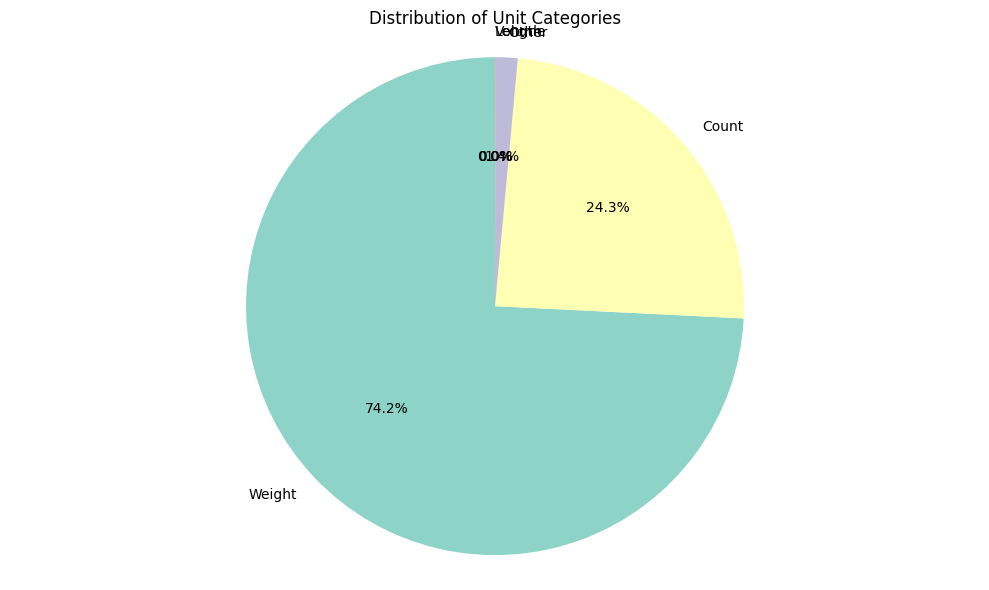

In [28]:
# Visualize unit categories
plt.figure(figsize=(10, 6))
unit_cat_counts = train_df['unit_category'].value_counts()
colors = plt.cm.Set3(range(len(unit_cat_counts)))
plt.pie(unit_cat_counts.values, labels=unit_cat_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Unit Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 7. Value Field Analysis

In [29]:
# Convert value to numeric
train_df['value_numeric'] = pd.to_numeric(train_df['value'], errors='coerce')

print("\nValue Field Statistics:")
print(f"Items with numeric value: {train_df['value_numeric'].notna().sum():,} ({train_df['value_numeric'].notna().sum()/len(train_df)*100:.2f}%)")
print(f"\nNumeric Value Stats:")
print(train_df['value_numeric'].describe())


Value Field Statistics:
Items with numeric value: 74,060 (98.75%)

Numeric Value Stats:
count    74060.000000
mean        54.306073
std        461.818743
min          0.000000
25%          6.000000
50%         16.000000
75%         48.000000
max      63882.000000
Name: value_numeric, dtype: float64


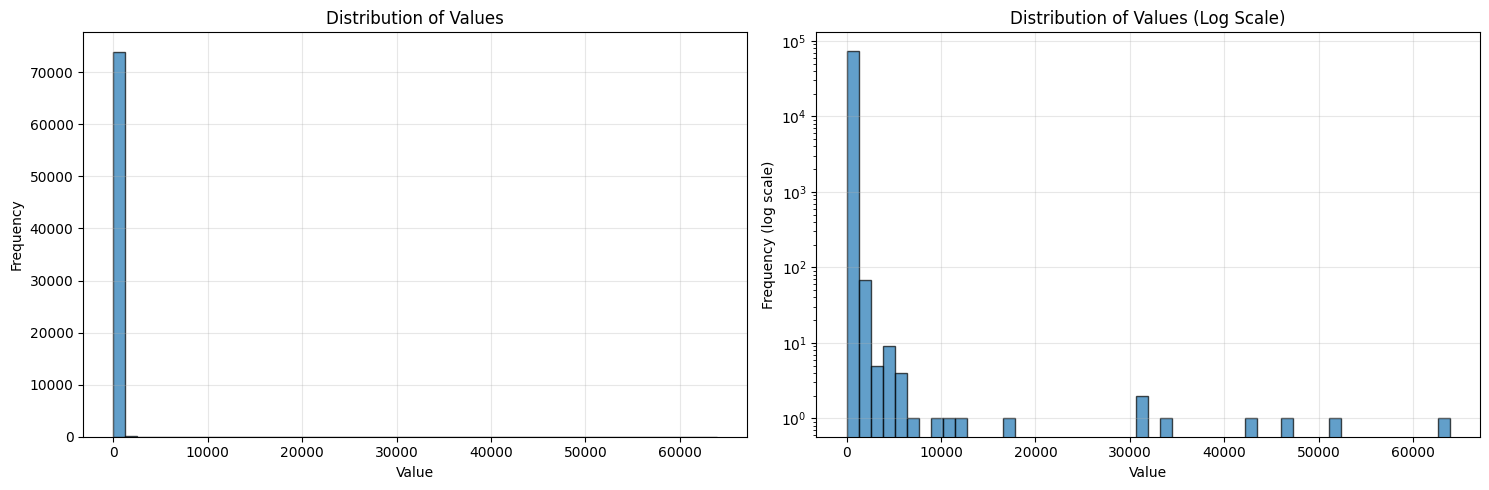

In [30]:
# Visualize value distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(train_df['value_numeric'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Values')
axes[0].grid(alpha=0.3)

# Log scale for better visualization
axes[1].hist(train_df['value_numeric'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency (log scale)')
axes[1].set_title('Distribution of Values (Log Scale)')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Price Analysis

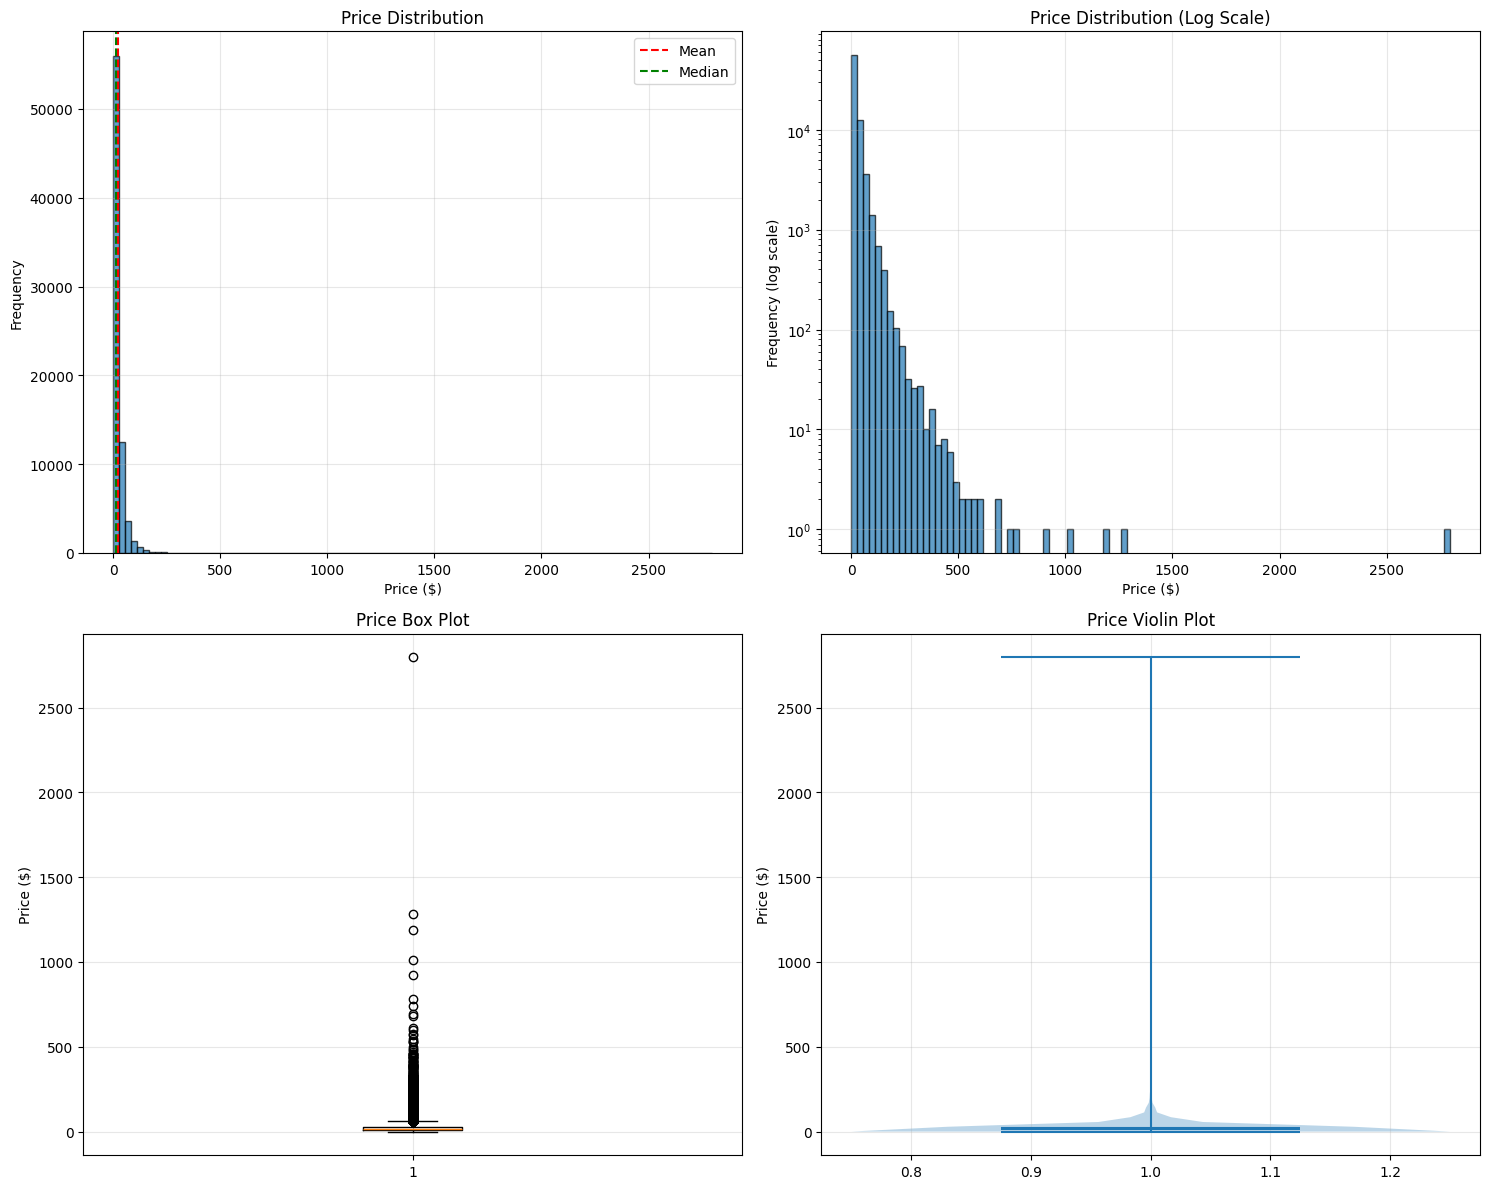

In [31]:
# Price distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(train_df['price'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].axvline(train_df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(train_df['price'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Log scale histogram
axes[0, 1].hist(train_df['price'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency (log scale)')
axes[0, 1].set_title('Price Distribution (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(alpha=0.3)

# Box plot
axes[1, 0].boxplot(train_df['price'], vert=True)
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price Box Plot')
axes[1, 0].grid(alpha=0.3)

# Violin plot
parts = axes[1, 1].violinplot([train_df['price'].dropna()], vert=True, showmeans=True, showmedians=True)
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price Violin Plot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
# Price ranges
price_ranges = [
    (0, 10, '$0-$10'),
    (10, 25, '$10-$25'),
    (25, 50, '$25-$50'),
    (50, 100, '$50-$100'),
    (100, 250, '$100-$250'),
    (250, 500, '$250-$500'),
    (500, 1000, '$500-$1000'),
    (1000, float('inf'), '$1000+')
]

price_range_counts = []
for low, high, label in price_ranges:
    count = ((train_df['price'] >= low) & (train_df['price'] < high)).sum()
    price_range_counts.append((label, count))

print("\nPrice Range Distribution:")
for label, count in price_range_counts:
    print(f"{label:15s}: {count:6,} ({count/len(train_df)*100:5.2f}%)")


Price Range Distribution:
$0-$10         : 28,512 (38.02%)
$10-$25        : 24,764 (33.02%)
$25-$50        : 13,616 (18.15%)
$50-$100       :  6,215 ( 8.29%)
$100-$250      :  1,741 ( 2.32%)
$250-$500      :    135 ( 0.18%)
$500-$1000     :     13 ( 0.02%)
$1000+         :      4 ( 0.01%)


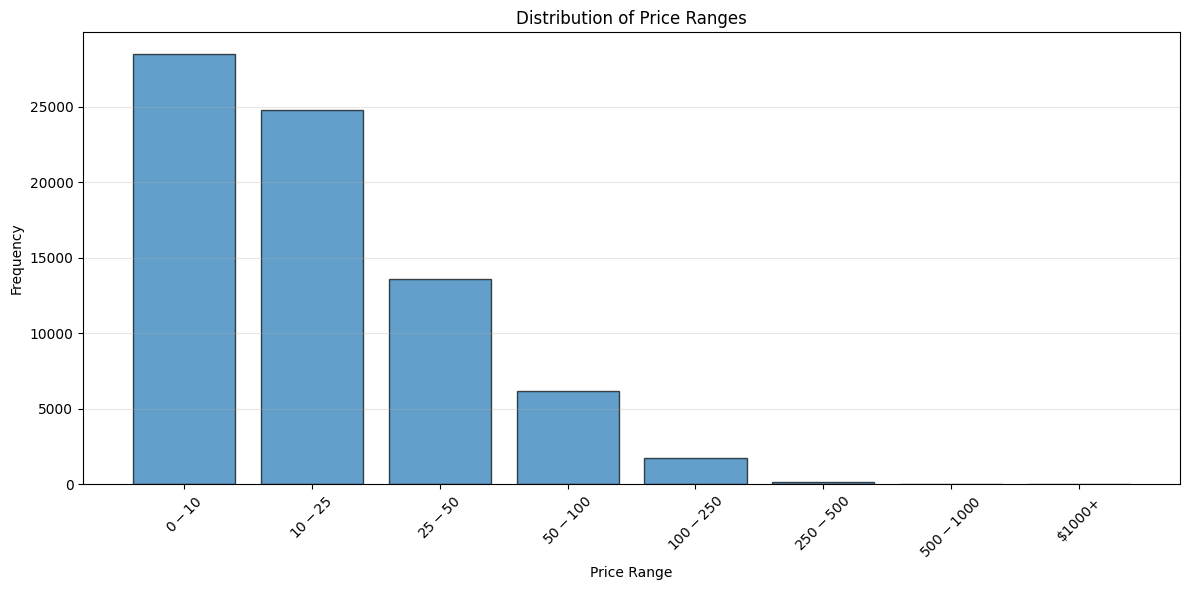

In [33]:
# Visualize price ranges
plt.figure(figsize=(12, 6))
labels, counts = zip(*price_range_counts)
plt.bar(range(len(labels)), counts, edgecolor='black', alpha=0.7)
plt.xticks(range(len(labels)), labels, rotation=45)
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Distribution of Price Ranges')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Image Link Analysis

In [34]:
# Analyze image links
print("Image Link Statistics:")
print(f"Total images: {train_df['image_link'].notna().sum():,}")
print(f"Missing images: {train_df['image_link'].isna().sum():,}")
print(f"Unique images: {train_df['image_link'].nunique():,}")

# Check if all links are from Amazon
amazon_links = train_df['image_link'].str.contains('amazon', case=False, na=False).sum()
print(f"\nAmazon image links: {amazon_links:,} ({amazon_links/len(train_df)*100:.2f}%)")

Image Link Statistics:
Total images: 75,000
Missing images: 0
Unique images: 72,288

Amazon image links: 75,000 (100.00%)


In [53]:
# Find duplicate image links (i.e., URLs that appear more than once)
duplicate_links = train_df[train_df['image_link'].duplicated(keep=False)]

# Sort them by image_link for easier viewing
duplicate_links = duplicate_links.sort_values(by='image_link')

# Display the duplicate rows
print(f"Total duplicated image links: {duplicate_links['image_link'].nunique()}")
duplicate_links.head(40)


Total duplicated image links: 2175


,sample_id,catalog_content,image_link,price,item_name,value,unit,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category,value_numeric,image_id
41894,143312,Item Name: Topps Baby Bottle Pop Candy (Pack o...,https://m.media-amazon.com/images/I/11RHBkJYc2...,49.800,Topps Baby Bottle Pop Candy (Pack of 18),1.0,Count,40.0,8.0,0,True,118,Count,1.0,11RHBkJYc2L
20960,143302,Item Name: Topps Baby Bottle Pop Candy (Pack o...,https://m.media-amazon.com/images/I/11RHBkJYc2...,45.700,Topps Baby Bottle Pop Candy (Pack of 16),1.0,Count,40.0,8.0,0,True,118,Count,1.0,11RHBkJYc2L
36353,39215,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.975,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",32.0,Fl Oz,40.0,7.0,0,False,76,Weight,32.0,11ddBQDd70L
68509,38521,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.975,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",32.0,Ounce,40.0,7.0,0,False,76,Weight,32.0,11ddBQDd70L
23415,38171,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.835,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",1.0,Count,40.0,7.0,0,False,75,Count,1.0,11ddBQDd70L
2419,139760,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,81.260,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
68024,139765,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,93.170,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
14052,139756,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,158.870,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
38069,42242,"Item Name: Amy's Kitchen Golden Lentil Soup, 1...",https://m.media-amazon.com/images/I/21-rPJmk0G...,5.990,"Amy's Kitchen Golden Lentil Soup, 14.4-Ounce C...",172.8,Fl Oz,86.0,13.0,0,False,123,Weight,172.8,21-rPJmk0GL
35181,38349,"Item Name: Amy's Kitchen Golden Lentil Soup, 1...",https://m.media-amazon.com/images/I/21-rPJmk0G...,5.990,"Amy's Kitchen Golden Lentil Soup, 14.4-Ounce C...",172.8,Fl Oz,87.0,14.0,0,False,142,Weight,172.8,21-rPJmk0GL


In [54]:
# 1. Rows with duplicate image links (drop sample_id)
duplicate_links = train_df[train_df['image_link'].duplicated(keep=False)]
duplicate_links = duplicate_links.sort_values(by='image_link')
duplicate_links = duplicate_links.drop(columns=['sample_id'], errors='ignore')

print("Total duplicated image links:", duplicate_links['image_link'].nunique())
display(duplicate_links.head(40))


# 2. Rows identical except for price
cols_except_price = [c for c in train_df.columns if c not in ['price', 'sample_id']]

same_except_price = (
    train_df.groupby(cols_except_price)
    .filter(lambda x: x['price'].nunique() > 1)
)

same_except_price = same_except_price.sort_values(by='image_link', ignore_index=True)
print("Rows identical except for price:", len(same_except_price))
display(same_except_price.head(40))


Total duplicated image links: 2175


,catalog_content,image_link,price,item_name,value,unit,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category,value_numeric,image_id
41894,Item Name: Topps Baby Bottle Pop Candy (Pack o...,https://m.media-amazon.com/images/I/11RHBkJYc2...,49.800,Topps Baby Bottle Pop Candy (Pack of 18),1.0,Count,40.0,8.0,0,True,118,Count,1.0,11RHBkJYc2L
20960,Item Name: Topps Baby Bottle Pop Candy (Pack o...,https://m.media-amazon.com/images/I/11RHBkJYc2...,45.700,Topps Baby Bottle Pop Candy (Pack of 16),1.0,Count,40.0,8.0,0,True,118,Count,1.0,11RHBkJYc2L
36353,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.975,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",32.0,Fl Oz,40.0,7.0,0,False,76,Weight,32.0,11ddBQDd70L
68509,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.975,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",32.0,Ounce,40.0,7.0,0,False,76,Weight,32.0,11ddBQDd70L
23415,"Item Name: IMAGINE SOUP BUTTERNUT SQUASH ORG, ...",https://m.media-amazon.com/images/I/11ddBQDd70...,4.835,"IMAGINE SOUP BUTTERNUT SQUASH ORG, 32 OZ",1.0,Count,40.0,7.0,0,False,75,Count,1.0,11ddBQDd70L
2419,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,81.260,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
68024,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,93.170,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
14052,"Item Name: Lehi Roller Mills, Cookie Mix, Pump...",https://m.media-amazon.com/images/I/21-4sRJZfj...,158.870,"Lehi Roller Mills, Cookie Mix, Pumpkin Chocola...",1.0,Count,66.0,11.0,0,False,101,Count,1.0,21-4sRJZfjL
38069,"Item Name: Amy's Kitchen Golden Lentil Soup, 1...",https://m.media-amazon.com/images/I/21-rPJmk0G...,5.990,"Amy's Kitchen Golden Lentil Soup, 14.4-Ounce C...",172.8,Fl Oz,86.0,13.0,0,False,123,Weight,172.8,21-rPJmk0GL
35181,"Item Name: Amy's Kitchen Golden Lentil Soup, 1...",https://m.media-amazon.com/images/I/21-rPJmk0G...,5.990,"Amy's Kitchen Golden Lentil Soup, 14.4-Ounce C...",172.8,Fl Oz,87.0,14.0,0,False,142,Weight,172.8,21-rPJmk0GL


Rows identical except for price: 64


,sample_id,catalog_content,image_link,price,item_name,value,unit,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category,value_numeric,image_id
0,48630,"Item Name: Natural Cane Sugar,Jug\nValue: 48.0...",https://m.media-amazon.com/images/I/21Qqeb-waY...,11.245,"Natural Cane Sugar,Jug",48.0,Ounce,22.0,3.0,0,False,58,Weight,48.00,21Qqeb-waYL
1,48851,"Item Name: Natural Cane Sugar,Jug\nValue: 48.0...",https://m.media-amazon.com/images/I/21Qqeb-waY...,18.500,"Natural Cane Sugar,Jug",48.0,Ounce,22.0,3.0,0,False,58,Weight,48.00,21Qqeb-waYL
2,39240,Item Name: WHOLESOME SWEETENERS SUGAR CANE ORG...,https://m.media-amazon.com/images/I/21soCCRDfC...,97.000,"WHOLESOME SWEETENERS SUGAR CANE ORG FTC, 25 LB",400.0,Fl Oz,46.0,8.0,0,False,83,Weight,400.00,21soCCRDfCL
3,42168,Item Name: WHOLESOME SWEETENERS SUGAR CANE ORG...,https://m.media-amazon.com/images/I/21soCCRDfC...,99.785,"WHOLESOME SWEETENERS SUGAR CANE ORG FTC, 25 LB",400.0,Fl Oz,46.0,8.0,0,False,83,Weight,400.00,21soCCRDfCL
4,37579,Item Name: HEALTH VALLEY SOUP MINESTRONE NS OR...,https://m.media-amazon.com/images/I/313Q9sQClb...,3.790,"HEALTH VALLEY SOUP MINESTRONE NS ORG, 15 OZ",1.0,Count,43.0,8.0,0,False,78,Count,1.00,313Q9sQClbL
5,39374,Item Name: HEALTH VALLEY SOUP MINESTRONE NS OR...,https://m.media-amazon.com/images/I/313Q9sQClb...,3.590,"HEALTH VALLEY SOUP MINESTRONE NS ORG, 15 OZ",1.0,Count,43.0,8.0,0,False,78,Count,1.00,313Q9sQClbL
6,48752,"Item Name: Pickapeppa Sauce, 5-Ounce Bottles (...",https://m.media-amazon.com/images/I/41c7wku8hM...,6.490,"Pickapeppa Sauce, 5-Ounce Bottles (Pack of 12)...",60.0,Fl Oz,71.0,11.0,0,False,107,Weight,60.00,41c7wku8hML
7,48579,"Item Name: Pickapeppa Sauce, 5-Ounce Bottles (...",https://m.media-amazon.com/images/I/41c7wku8hM...,6.990,"Pickapeppa Sauce, 5-Ounce Bottles (Pack of 12)...",60.0,Fl Oz,71.0,11.0,0,False,107,Weight,60.00,41c7wku8hML
8,48508,Item Name: Mojo Marinade Sauce – 20 fl oz\nVal...,https://m.media-amazon.com/images/I/41koVj5fgZ...,3.240,Mojo Marinade Sauce – 20 fl oz,20.0,Fl Oz,30.0,7.0,0,False,66,Weight,20.00,41koVj5fgZL
9,48708,Item Name: Mojo Marinade Sauce – 20 fl oz\nVal...,https://m.media-amazon.com/images/I/41koVj5fgZ...,5.445,Mojo Marinade Sauce – 20 fl oz,20.0,Fl Oz,30.0,7.0,0,False,66,Weight,20.00,41koVj5fgZL


In [55]:
import pandas as pd

# Columns to compare (exclude 'price' and 'sample_id')
cols_to_compare = [c for c in train_df.columns if c not in ('price', 'sample_id')]

# Normalized copy used only for exact comparison
df_norm = train_df.copy()
for c in cols_to_compare:
    df_norm[c] = df_norm[c].fillna('').astype(str).str.strip().str.lower()

# Build a comparison key from all comparison columns
df_norm['_key'] = df_norm[cols_to_compare].agg('||'.join, axis=1)

# Keep groups where price is not unique (i.e., same other columns but different prices)
groups_with_price_diff = df_norm.groupby('_key').filter(
    lambda g: train_df.loc[g.index, 'price'].nunique() > 1
)

if groups_with_price_diff.empty:
    print("No groups found where all columns except 'price' are identical but 'price' differs.")
else:
    # Show original rows (not normalized) for clarity
    result = train_df.loc[groups_with_price_diff.index].sort_values(by='image_link', ignore_index=True)
    display(result)   # use print(result) if not in a notebook

    # Summary: count and price range per identical-group
    summary = (
        result.assign(_key=df_norm.loc[result.index, '_key'].values)
        .groupby('_key')['price']
        .agg(count='size', n_prices='nunique', price_min='min', price_max='max')
        .reset_index()
        .sort_values(['count', 'n_prices'], ascending=False)
    )
    display(summary)


,sample_id,catalog_content,image_link,price,item_name,value,unit,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category,value_numeric,image_id
0,48851,"Item Name: Natural Cane Sugar,Jug\nValue: 48.0...",https://m.media-amazon.com/images/I/21Qqeb-waY...,18.500,"Natural Cane Sugar,Jug",48.0,Ounce,22.0,3.0,0,False,58,Weight,48.00,21Qqeb-waYL
1,48630,"Item Name: Natural Cane Sugar,Jug\nValue: 48.0...",https://m.media-amazon.com/images/I/21Qqeb-waY...,11.245,"Natural Cane Sugar,Jug",48.0,Ounce,22.0,3.0,0,False,58,Weight,48.00,21Qqeb-waYL
2,42168,Item Name: WHOLESOME SWEETENERS SUGAR CANE ORG...,https://m.media-amazon.com/images/I/21soCCRDfC...,99.785,"WHOLESOME SWEETENERS SUGAR CANE ORG FTC, 25 LB",400.0,Fl Oz,46.0,8.0,0,False,83,Weight,400.00,21soCCRDfCL
3,39240,Item Name: WHOLESOME SWEETENERS SUGAR CANE ORG...,https://m.media-amazon.com/images/I/21soCCRDfC...,97.000,"WHOLESOME SWEETENERS SUGAR CANE ORG FTC, 25 LB",400.0,Fl Oz,46.0,8.0,0,False,83,Weight,400.00,21soCCRDfCL
4,37579,Item Name: HEALTH VALLEY SOUP MINESTRONE NS OR...,https://m.media-amazon.com/images/I/313Q9sQClb...,3.790,"HEALTH VALLEY SOUP MINESTRONE NS ORG, 15 OZ",1.0,Count,43.0,8.0,0,False,78,Count,1.00,313Q9sQClbL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,284145,"Item Name: McCormick Cumin Seed, 0.95 Oz\nBull...",https://m.media-amazon.com/images/I/910OgcUYSQ...,8.285,"McCormick Cumin Seed, 0.95 Oz",0.95,Ounce,29.0,5.0,7,False,587,Weight,0.95,910OgcUYSQL
70,259023,Item Name: French's White Cheddar Crispy Fried...,https://m.media-amazon.com/images/I/91KJlAQg0T...,26.960,"French's White Cheddar Crispy Fried Onions, 6 oz",6.0,Ounce,48.0,8.0,5,False,422,Weight,6.00,91KJlAQg0TL
71,276717,Item Name: French's White Cheddar Crispy Fried...,https://m.media-amazon.com/images/I/91KJlAQg0T...,5.690,"French's White Cheddar Crispy Fried Onions, 6 oz",6.0,Ounce,48.0,8.0,5,False,422,Weight,6.00,91KJlAQg0TL
72,136087,"Item Name: Casserole Pinto Beans, 2 Pound\nBul...",https://m.media-amazon.com/images/I/91ro8DPaUx...,7.950,"Casserole Pinto Beans, 2 Pound",32.0,ounce,30.0,5.0,0,False,86,Weight,32.00,91ro8DPaUxL


,_key,count,n_prices,price_min,price_max
0,item name: 5 costa rican vanilla beans whole g...,1,1,26.96,26.96
1,item name: absolutely gluten free original cra...,1,1,5.79,5.79
2,"item name: albanese assorted gummi bears, suga...",1,1,2.49,2.49
3,item name: aloha organic plant based protein b...,1,1,6.82,6.82
4,"item name: amys chili spicy gf org, 14.7 oz\nv...",1,1,21.98,21.98
...,...,...,...,...,...
69,item name: vineco original series chilean sauv...,1,1,6.99,6.99
70,"item name: voortman bakery vanilla wafers, meg...",1,1,7.10,7.10
71,"item name: yoo-hoo chocolate drink, 4 ct\nbull...",1,1,7.54,7.54
72,item name: you need this sea salt almond flour...,1,1,8.55,8.55


In [56]:
import pandas as pd

# 1. Drop any derived or target-related features (example: if such columns exist)
# Here we assume only 'price' is the target and we don't have derived columns from it.
# If you had features like 'price_per_unit', you'd drop them here:
derived_from_price = [col for col in train_df.columns if 'price' in col and col != 'price']
train_df = train_df.drop(columns=derived_from_price, errors='ignore')


# 2. Identify duplicates (identical except price)
cols_except_price = [c for c in train_df.columns if c not in ['price', 'sample_id']]

# Group by non-price columns and average price
train_df_cleaned = (
    train_df.groupby(cols_except_price, as_index=False)['price']
    .mean()   # average price across identical rows
)

# 3. Optional: sort for readability
train_df_cleaned = train_df_cleaned.sort_values(by='image_link', ignore_index=True)

print(f"Original rows: {len(train_df)}")
print(f"Rows after merging duplicates with averaged prices: {len(train_df_cleaned)}")
display(train_df_cleaned.head(40))


Original rows: 75000
Rows after merging duplicates with averaged prices: 74008


,catalog_content,image_link,item_name,value,unit,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category,value_numeric,image_id,price
0,"Item Name: LA MOLISANA PASTA ANELLI SICILIANI,...",https://m.media-amazon.com/images/I/01O1AwI4pJ...,"LA MOLISANA PASTA ANELLI SICILIANI, 16 OZ Pack...",192.0,ounce,52.0,10.0,4,False,326,Weight,192.00,01O1AwI4pJL,31.060
1,Item Name: Professional French Bavarian Creme ...,https://m.media-amazon.com/images/I/01SCsYMIKj...,Professional French Bavarian Creme - 2lb Pak,32.0,Ounce,44.0,7.0,2,True,485,Weight,32.00,01SCsYMIKjL,14.990
2,Item Name: Lawrys Seasoned Salt 16OZ (Pack of ...,https://m.media-amazon.com/images/I/11+1w3qzdn...,Lawrys Seasoned Salt 16OZ (Pack of 24),384.0,Ounce,38.0,7.0,0,False,75,Weight,384.00,11+1w3qzdnL,4.555
3,Item Name: Prego 100% Natural Chunky Garden To...,https://m.media-amazon.com/images/I/11+C-FVBGY...,"Prego 100% Natural Chunky Garden Tomato, Onion...",288.0,Oz,86.0,16.0,2,True,308,Weight,288.00,11+C-FVBGYL,5.305
4,Item Name: Blue Mountain Burnt Sugar 12oz Pack...,https://m.media-amazon.com/images/I/11+D0l8dN+...,Blue Mountain Burnt Sugar 12oz Pack of 2,24.0,Ounce,40.0,8.0,0,False,76,Weight,24.00,11+D0l8dN+L,9.890
5,"Item Name: Hain Mayonnaise, Safflower , 12-Oun...",https://m.media-amazon.com/images/I/11+WeHT-1E...,"Hain Mayonnaise, Safflower , 12-Ounce (Pack of...",144.0,Fl Oz,75.0,12.0,0,False,112,Weight,144.00,11+WeHT-1EL,16.250
6,Item Name: Thai Kitchen Fish Sauce ( 12 x 7 OZ...,https://m.media-amazon.com/images/I/11-Q3FY7hp...,Thai Kitchen Fish Sauce ( 12 x 7 OZ),84.0,Ounce,36.0,9.0,0,True,756,Weight,84.00,11-Q3FY7hpL,4.710
7,"Item Name: PACIFIC FOODS SOUP GF CRM TMO ORG, ...",https://m.media-amazon.com/images/I/11-cLFswjl...,"PACIFIC FOODS SOUP GF CRM TMO ORG, 32 OZ, PK- 12",32.0,Fl Oz,48.0,11.0,0,False,84,Weight,32.00,11-cLFswjlL,4.710
8,"Item Name: Reese Syrup, Cream Menthe, 8-Ounce ...",https://m.media-amazon.com/images/I/110+Vfak1V...,"Reese Syrup, Cream Menthe, 8-Ounce (Pack of 6)",48.0,Ounce,46.0,8.0,0,False,82,Weight,48.00,110+Vfak1VL,10.520
9,Item Name: Simply Organic Cumin Seed - Organic...,https://m.media-amazon.com/images/I/110aIeKJda...,Simply Organic Cumin Seed - Organic - Ground -...,2.76,Fl Oz,65.0,15.0,0,False,101,Weight,2.76,110aIeKJdaL,32.490


In [57]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74008 entries, 0 to 74007
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   catalog_content         74008 non-null  object 
 1   image_link              74008 non-null  object 
 2   item_name               74008 non-null  object 
 3   value                   74008 non-null  object 
 4   unit                    74008 non-null  object 
 5   item_name_length        74008 non-null  float64
 6   item_name_word_count    74008 non-null  float64
 7   bullet_point_count      74008 non-null  int64  
 8   has_description         74008 non-null  bool   
 9   catalog_content_length  74008 non-null  int64  
 10  unit_category           74008 non-null  object 
 11  value_numeric           74008 non-null  float64
 12  image_id                74008 non-null  object 
 13  price                   74008 non-null  float64
dtypes: bool(1), float64(4), int64(2), obje

In [35]:
# Extract image IDs from links
def extract_image_id(link):
    if pd.isna(link):
        return None
    match = re.search(r'/I/([^.]+)\.', link)
    return match.group(1) if match else None

train_df['image_id'] = train_df['image_link'].apply(extract_image_id)
print(f"\nExtracted image IDs: {train_df['image_id'].notna().sum():,}")
print(f"Unique image IDs: {train_df['image_id'].nunique():,}")


Extracted image IDs: 75,000
Unique image IDs: 72,288


## 10. Correlation Analysis

In [36]:
# Select numeric columns for correlation
numeric_cols = ['price', 'value_numeric', 'item_name_length', 'item_name_word_count', 
                'bullet_point_count', 'catalog_content_length']

correlation_df = train_df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_df.to_string())


Correlation Matrix:
                           price  value_numeric  item_name_length  item_name_word_count  bullet_point_count  catalog_content_length
price                   1.000000       0.066052          0.086686              0.093508            0.017621                0.146752
value_numeric           0.066052       1.000000         -0.003878             -0.001619           -0.010964               -0.016919
item_name_length        0.086686      -0.003878          1.000000              0.975272            0.369069                0.563412
item_name_word_count    0.093508      -0.001619          0.975272              1.000000            0.354269                0.565722
bullet_point_count      0.017621      -0.010964          0.369069              0.354269            1.000000                0.579314
catalog_content_length  0.146752      -0.016919          0.563412              0.565722            0.579314                1.000000


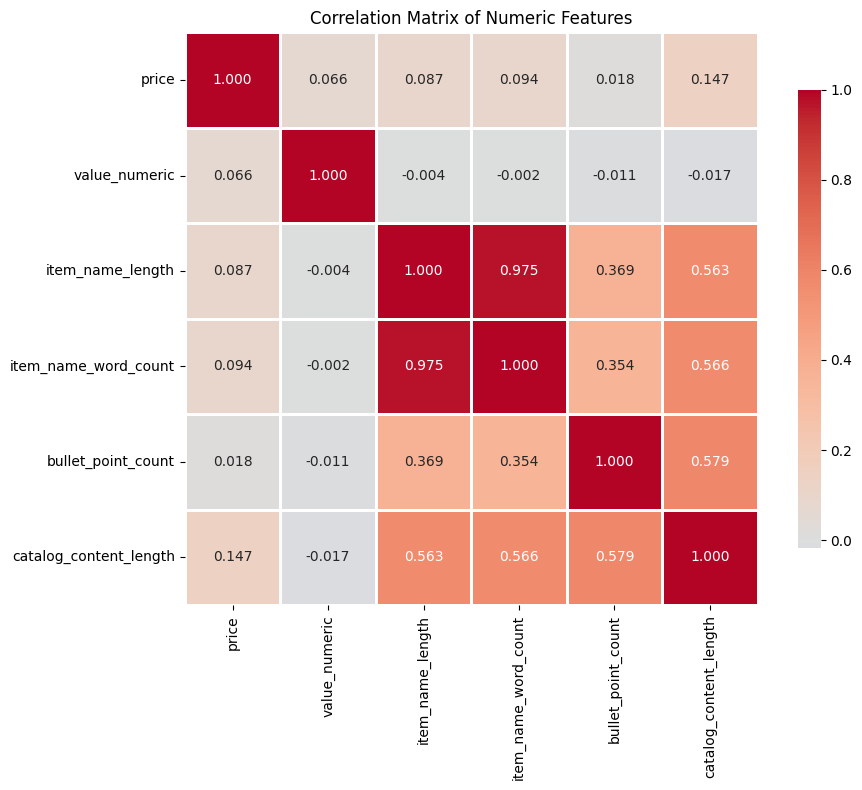

In [37]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

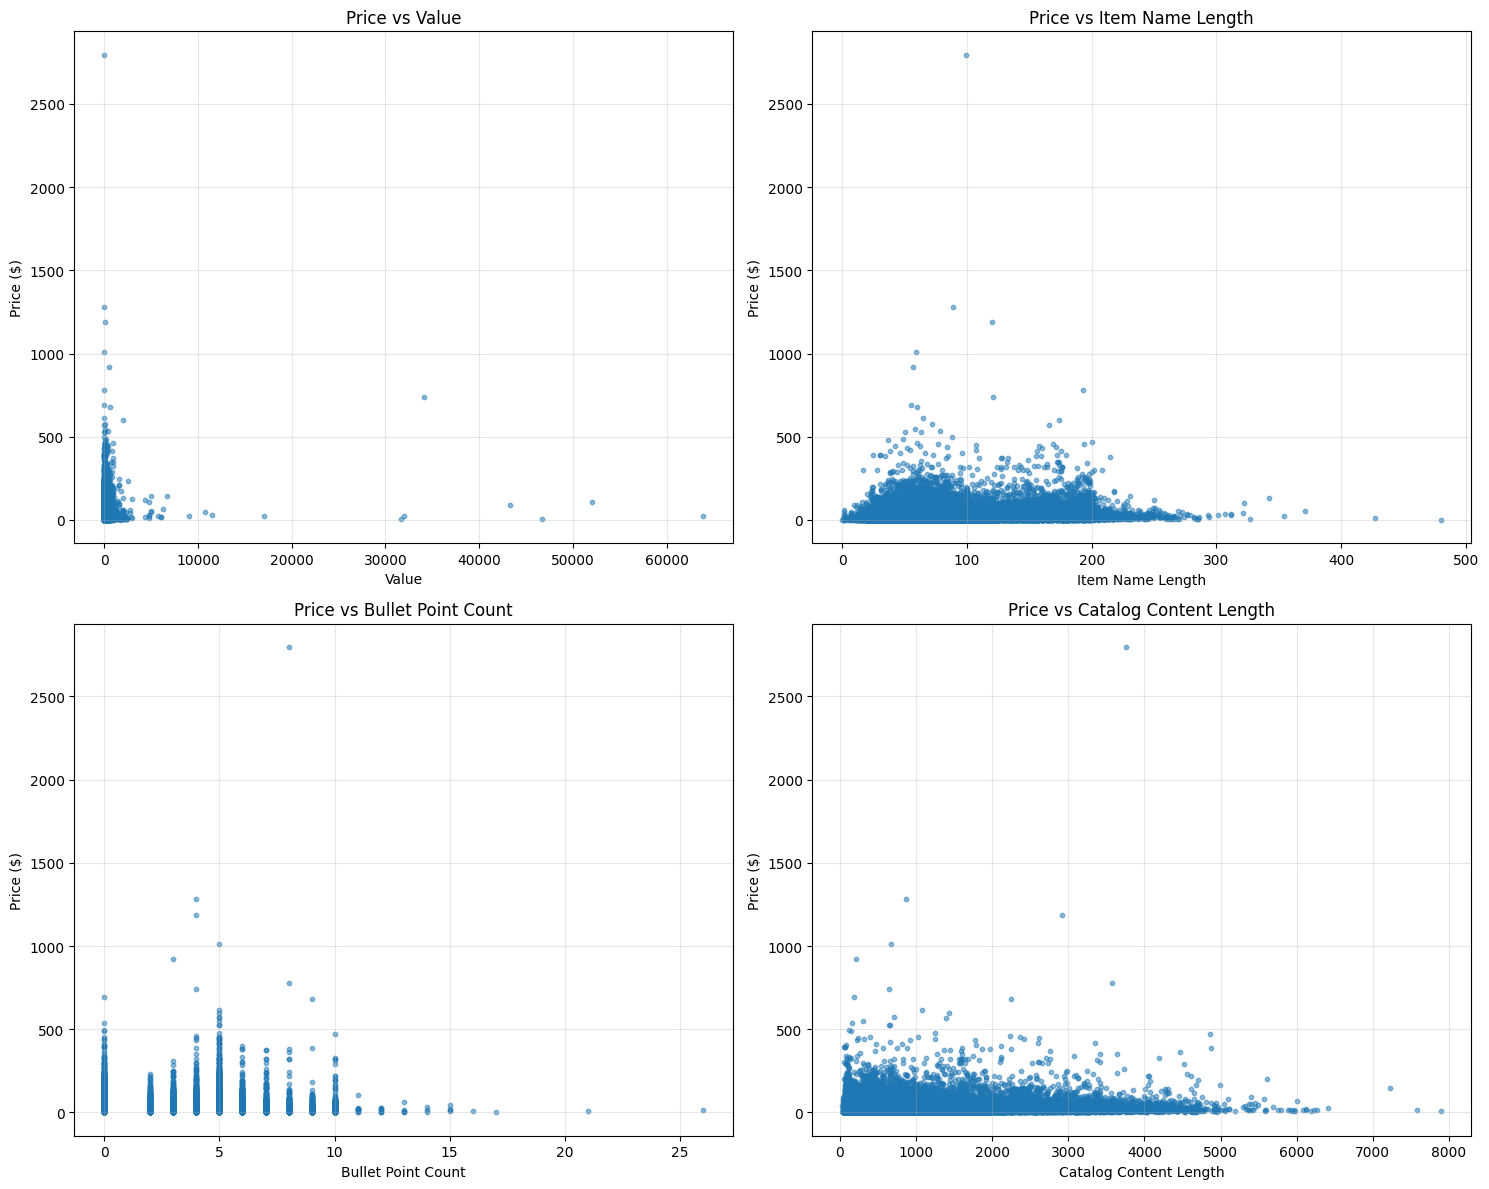

In [38]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price vs Value
axes[0, 0].scatter(train_df['value_numeric'], train_df['price'], alpha=0.5, s=10)
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Value')
axes[0, 0].grid(alpha=0.3)

# Price vs Item Name Length
axes[0, 1].scatter(train_df['item_name_length'], train_df['price'], alpha=0.5, s=10)
axes[0, 1].set_xlabel('Item Name Length')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Item Name Length')
axes[0, 1].grid(alpha=0.3)

# Price vs Bullet Point Count
axes[1, 0].scatter(train_df['bullet_point_count'], train_df['price'], alpha=0.5, s=10)
axes[1, 0].set_xlabel('Bullet Point Count')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Bullet Point Count')
axes[1, 0].grid(alpha=0.3)

# Price vs Catalog Content Length
axes[1, 1].scatter(train_df['catalog_content_length'], train_df['price'], alpha=0.5, s=10)
axes[1, 1].set_xlabel('Catalog Content Length')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price vs Catalog Content Length')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Price by Unit Category

In [39]:
# Price statistics by unit category
print("\nPrice Statistics by Unit Category:")
price_by_unit = train_df.groupby('unit_category')['price'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
price_by_unit = price_by_unit.sort_values('mean', ascending=False)
print(price_by_unit.to_string())


Price Statistics by Unit Category:
               count       mean  median        std    min      max
unit_category                                                     
Length             2  85.970000   85.97   5.925555  81.78    90.16
Other           1075  33.469051   13.95  48.446171   0.49   385.00
Count          18240  29.950414   18.51  42.319122   0.39  2796.00
Volume            21  26.539762   14.90  31.079210   1.00   109.99
Weight         55662  21.389278   12.99  29.128237   0.13  1280.00


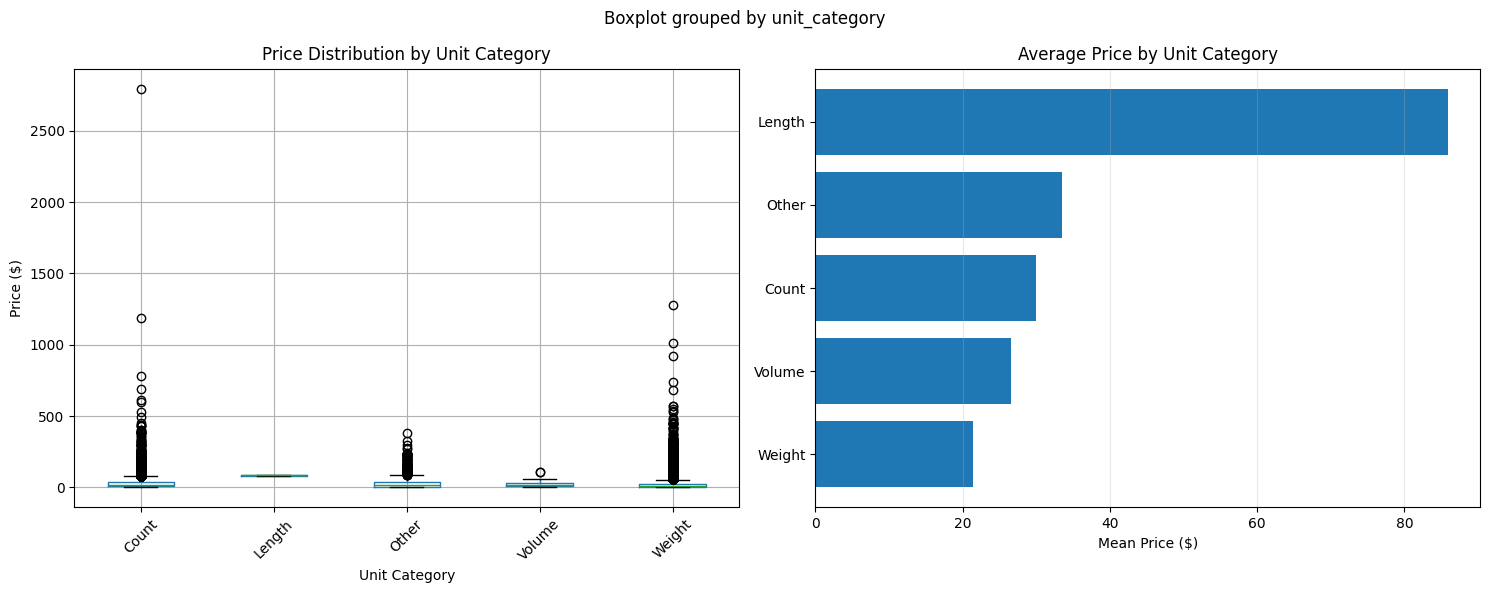

In [40]:
# Visualize price by unit category
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot
train_df.boxplot(column='price', by='unit_category', ax=axes[0])
axes[0].set_xlabel('Unit Category')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Price Distribution by Unit Category')
axes[0].tick_params(axis='x', rotation=45)
plt.sca(axes[0])
plt.xticks(rotation=45)

# Bar plot of mean prices
mean_prices = train_df.groupby('unit_category')['price'].mean().sort_values(ascending=False)
axes[1].barh(range(len(mean_prices)), mean_prices.values)
axes[1].set_yticks(range(len(mean_prices)))
axes[1].set_yticklabels(mean_prices.index)
axes[1].set_xlabel('Mean Price ($)')
axes[1].set_title('Average Price by Unit Category')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Outlier Detection

In [41]:
# Detect outliers using IQR method for price
Q1 = train_df['price'].quantile(0.25)
Q3 = train_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_outliers = train_df[(train_df['price'] < lower_bound) | (train_df['price'] > upper_bound)]

print("\nPrice Outlier Detection (IQR Method):")
print(f"Q1: ${Q1:.2f}")
print(f"Q3: ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers: {len(price_outliers):,} ({len(price_outliers)/len(train_df)*100:.2f}%)")
print(f"\nOutlier price range: ${price_outliers['price'].min():.2f} - ${price_outliers['price'].max():.2f}")


Price Outlier Detection (IQR Method):
Q1: $6.79
Q3: $28.62
IQR: $21.83
Lower bound: $-25.95
Upper bound: $61.37

Number of outliers: 5,524 (7.37%)

Outlier price range: $61.39 - $2796.00


In [42]:
# Top 10 most expensive items
print("\nTop 10 Most Expensive Items:")
top_expensive = train_df.nlargest(10, 'price')[['sample_id', 'item_name', 'price', 'unit']]
print(top_expensive.to_string(index=False))


Top 10 Most Expensive Items:
 sample_id                                                                                                                                                                                         item_name   price  unit
    229126                                                                                               4Patriots 1-Year Survival Food Kit: Emergency Food Supply Designed to Last 25 Years, 2,752 Servings 2796.00 Count
    134909                                                                                                         Royal Amber Osetra Caviar - Russian Sturgeon Roe - Giaveri Italian (16 ounce (450 grams)) 1280.00 Ounce
     62251                                                                          495 days proteins meal 33 bottles x180 food 25 years shelf life gluten free none GMO 5940 delicious meal tablets Vanilla 1188.00 Count
    195806                                                                                    

In [43]:
# Top 10 cheapest items
print("\nTop 10 Cheapest Items:")
top_cheap = train_df.nsmallest(10, 'price')[['sample_id', 'item_name', 'price', 'unit']]
print(top_cheap.to_string(index=False))


Top 10 Cheapest Items:
 sample_id                                                                                             item_name  price  unit
    261551                                                       Merci European Chocolates, 7 Ounce (Pack of 10)   0.13    oz
    212063                                         Frank's RedHot Squeeze Sriracha Sauce, 1.7 fl oz (Pack of 24)   0.13 Fl Oz
    144562                                                             Maruchan Ramen Noodle Soup, Beef, 3 Ounce   0.30 ounce
    144673                                                           Maruchan Creamy Chicken Ramen Noodles, 3 oz   0.33 Ounce
     25417                                               Maruchan Ramen Beef, 0.1875-Ounce Packages (Pack of 24)   0.36 Ounce
     86997                                                            Kool-aid Watermelon Unsweetened 15 Packets   0.36 Ounce
    298503                                                                                 Koo

## 13. Data Completeness Analysis

In [44]:
# Analyze data completeness
completeness = pd.DataFrame({
    'Feature': ['sample_id', 'catalog_content', 'image_link', 'price', 
                'item_name', 'value', 'unit', 'bullet_points', 'product_description'],
    'Completeness': [
        train_df['sample_id'].notna().sum() / len(train_df) * 100,
        train_df['catalog_content'].notna().sum() / len(train_df) * 100,
        train_df['image_link'].notna().sum() / len(train_df) * 100,
        train_df['price'].notna().sum() / len(train_df) * 100,
        train_df['item_name'].notna().sum() / len(train_df) * 100,
        train_df['value'].notna().sum() / len(train_df) * 100,
        train_df['unit'].notna().sum() / len(train_df) * 100,
        (train_df['bullet_point_count'] > 0).sum() / len(train_df) * 100,
        train_df['has_description'].sum() / len(train_df) * 100
    ]
})

completeness = completeness.sort_values('Completeness', ascending=False)

print("\nData Completeness Analysis:")
print(completeness.to_string(index=False))


Data Completeness Analysis:
            Feature  Completeness
          sample_id    100.000000
    catalog_content    100.000000
         image_link    100.000000
              price    100.000000
              value    100.000000
               unit    100.000000
          item_name     99.990667
      bullet_points     72.634667
product_description     43.377333


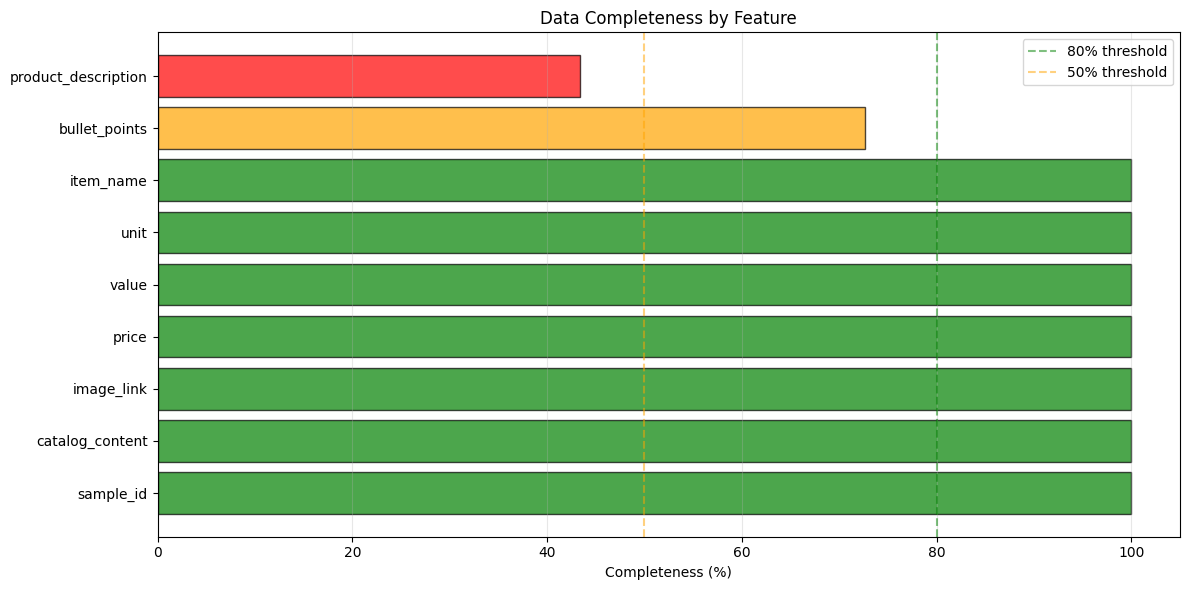

In [45]:
# Visualize data completeness
plt.figure(figsize=(12, 6))
colors = ['green' if x >= 80 else 'orange' if x >= 50 else 'red' for x in completeness['Completeness']]
plt.barh(range(len(completeness)), completeness['Completeness'], color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(completeness)), completeness['Feature'])
plt.xlabel('Completeness (%)')
plt.title('Data Completeness by Feature')
plt.axvline(x=80, color='green', linestyle='--', alpha=0.5, label='80% threshold')
plt.axvline(x=50, color='orange', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 14. Summary Statistics and Key Insights

In [46]:
print("="*80)
print("KEY INSIGHTS AND SUMMARY")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(train_df):,}")
print(f"   - Total features: {train_df.shape[1]}")
print(f"   - Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n2. DATA QUALITY:")
print(f"   - Duplicate rows: {train_df.duplicated().sum():,}")
print(f"   - Duplicate IDs: {train_df['sample_id'].duplicated().sum():,}")
print(f"   - Overall completeness: {(1 - train_df.isnull().sum().sum() / (len(train_df) * len(train_df.columns))) * 100:.2f}%")

print("\n3. PRICE STATISTICS:")
print(f"   - Mean price: ${train_df['price'].mean():.2f}")
print(f"   - Median price: ${train_df['price'].median():.2f}")
print(f"   - Price range: ${train_df['price'].min():.2f} - ${train_df['price'].max():.2f}")
print(f"   - Price outliers: {len(price_outliers):,} ({len(price_outliers)/len(train_df)*100:.2f}%)")

print("\n4. TEXT FEATURES:")
print(f"   - Avg item name length: {train_df['item_name_length'].mean():.2f} characters")
print(f"   - Avg bullet points: {train_df['bullet_point_count'].mean():.2f}")
print(f"   - Items with description: {train_df['has_description'].sum():,} ({train_df['has_description'].sum()/len(train_df)*100:.2f}%)")
print(f"   - Avg catalog content length: {train_df['catalog_content_length'].mean():.2f} characters")

print("\n5. UNIT INFORMATION:")
print(f"   - Unique units: {train_df['unit'].nunique()}")
print(f"   - Most common unit: {train_df['unit'].value_counts().index[0]} ({train_df['unit'].value_counts().values[0]:,} items)")
print(f"   - Unit categories: {train_df['unit_category'].nunique()}")

print("\n6. CORRELATIONS:")
print(f"   - Price vs Value: {train_df[['price', 'value_numeric']].corr().iloc[0, 1]:.4f}")
print(f"   - Price vs Item Name Length: {train_df[['price', 'item_name_length']].corr().iloc[0, 1]:.4f}")
print(f"   - Price vs Bullet Point Count: {train_df[['price', 'bullet_point_count']].corr().iloc[0, 1]:.4f}")

print("\n" + "="*80)

KEY INSIGHTS AND SUMMARY

1. DATASET OVERVIEW:
   - Total samples: 75,000
   - Total features: 15
   - Memory usage: 170.47 MB

2. DATA QUALITY:
   - Duplicate rows: 0
   - Duplicate IDs: 0
   - Overall completeness: 99.91%

3. PRICE STATISTICS:
   - Mean price: $23.65
   - Median price: $14.00
   - Price range: $0.13 - $2796.00
   - Price outliers: 5,524 (7.37%)

4. TEXT FEATURES:
   - Avg item name length: 86.04 characters
   - Avg bullet points: 3.49
   - Items with description: 32,533 (43.38%)
   - Avg catalog content length: 908.89 characters

5. UNIT INFORMATION:
   - Unique units: 92
   - Most common unit: Ounce (40,984 items)
   - Unit categories: 5

6. CORRELATIONS:
   - Price vs Value: 0.0661
   - Price vs Item Name Length: 0.0867
   - Price vs Bullet Point Count: 0.0176



## 15. Additional Feature Engineering Opportunities

In [47]:
print("\nPOTENTIAL FEATURE ENGINEERING IDEAS:")
print("\n1. Text-based features:")
print("   - TF-IDF vectors from item names")
print("   - Sentiment analysis of bullet points")
print("   - Named entity recognition for brands")
print("   - Word embeddings for semantic similarity")

print("\n2. Numeric features:")
print("   - Price per unit (price / value)")
print("   - Text richness score (bullet_count + has_description)")
print("   - Information density (catalog_length / item_name_length)")

print("\n3. Categorical features:")
print("   - Price bins (low, medium, high)")
print("   - Unit category one-hot encoding")
print("   - Product category extraction from item names")

print("\n4. Image features (if images are processed):")
print("   - Image embeddings from pre-trained models")
print("   - Color dominance")
print("   - Object detection features")


POTENTIAL FEATURE ENGINEERING IDEAS:

1. Text-based features:
   - TF-IDF vectors from item names
   - Sentiment analysis of bullet points
   - Named entity recognition for brands
   - Word embeddings for semantic similarity

2. Numeric features:
   - Price per unit (price / value)
   - Text richness score (bullet_count + has_description)
   - Information density (catalog_length / item_name_length)

3. Categorical features:
   - Price bins (low, medium, high)
   - Unit category one-hot encoding
   - Product category extraction from item names

4. Image features (if images are processed):
   - Image embeddings from pre-trained models
   - Color dominance
   - Object detection features


## 16. Export Processed Dataset

In [48]:
# Save processed dataset with new features
output_columns = ['sample_id', 'catalog_content', 'image_link', 'price', 
                  'item_name', 'value', 'unit', 'value_numeric',
                  'item_name_length', 'item_name_word_count',
                  'bullet_point_count', 'has_description',
                  'catalog_content_length', 'unit_category']

processed_df = train_df[output_columns].copy()
processed_df.to_csv('DATA/train_processed.csv', index=False)
print("Processed dataset saved to: DATA/train_processed.csv")
print(f"Shape: {processed_df.shape}")

Processed dataset saved to: DATA/train_processed.csv
Shape: (75000, 14)


In [86]:
processed_df

,sample_id,catalog_content,image_link,price,item_name,value,unit,value_numeric,item_name_length,item_name_word_count,bullet_point_count,has_description,catalog_content_length,unit_category
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",72.0,Fl Oz,72.00,55.0,11.0,0,False,91,Weight
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,"Salerno Cookies, The Original Butter Cookies, ...",32.0,Ounce,32.00,65.0,11.0,5,False,511,Weight
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",11.4,Ounce,11.40,76.0,14.0,5,False,328,Weight
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,11.25,Ounce,11.25,153.0,28.0,5,True,1318,Weight
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",12.0,Count,12.00,52.0,10.0,0,False,155,Count
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,"ICE BREAKERS Spearmint Sugar Free Mints Tins, ...",12.0,Ounce,12.00,62.0,11.0,5,False,772,Weight
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,"Davidson's Organics, Vanilla Essence, 100-coun...",100.0,count,100.00,77.0,9.0,5,False,1707,Count
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,Jolly Rancher Hard Candy - Blue Raspberry - 5 ...,80.0,Ounce,80.00,66.0,12.0,0,True,142,Weight
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,Nescafe Dolce Gusto Capsules - CARAMEL MACCHIA...,16.0,Count,16.00,57.0,9.0,5,False,899,Count


In [85]:
print(processed_df.iloc[29]["item_name"])

Colour Mill Oil-Based Food Coloring, 100 Milliliters (Navy)
